In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
dataset_name = "gdp_per_capita_growth_ratio_max"

In [3]:
input_fname = "API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_6298776.csv"
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [4]:
data = pd.read_csv(input_fname, skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.264869,-1.255588,1.121182,6.474908,1.876401,-2.743402,-24.084569,27.696865,10.553786,NaN
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-2.342977,5.093993,2.330785,1.724010,2.436217,...,1.199306,0.158047,-0.495623,-0.081564,-0.191859,-0.633470,-5.334358,1.649947,0.869269,NaN
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-0.252715,1.593037,4.977374,3.132323,1.801776,...,3.090523,0.087834,-2.503057,-0.408930,0.165181,0.552387,-3.463222,1.367743,1.196174,NaN
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755,NaN


In [5]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [6]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,124.000000,128.000000,128.000000,128.000000,128.000000,136.000000,139.000000,140.000000,143.000000,...,257.000000,257.000000,256.000000,257.000000,258.000000,257.000000,256.000000,254.000000,242.000000,0.0
mean,NaN,1.131476,2.704779,2.563358,3.826542,2.978067,2.230819,1.757774,3.674718,4.478434,...,1.886612,1.337188,1.748091,1.944605,1.824898,1.590140,-5.816124,4.499204,3.189143,NaN
std,NaN,5.617762,4.340299,5.030005,4.421094,4.308466,4.333145,6.991282,7.285605,4.694023,...,3.212506,4.395779,3.606384,3.885701,2.860500,3.248443,7.639782,5.833937,5.936714,NaN
min,NaN,-26.527644,-20.910074,-14.521498,-14.404949,-15.115017,-10.550791,-17.500310,-6.758929,-9.268812,...,-24.463161,-29.921761,-12.202835,-9.033697,-18.586782,-12.429867,-55.188681,-22.966942,-22.419285,NaN
25%,NaN,-0.670982,0.991961,0.229998,1.715808,0.707845,-0.577078,-0.834189,0.957894,1.908624,...,0.531824,0.041680,0.258972,0.387482,0.459156,-0.050317,-8.178199,1.597418,1.303224,NaN
50%,NaN,1.789736,2.311359,3.000214,4.337281,2.971588,2.380778,1.785171,3.505640,4.182010,...,1.943377,1.652379,1.799339,1.971944,1.883852,1.542809,-4.737915,4.343664,2.785942,NaN
75%,NaN,3.881667,4.660534,4.743281,5.649974,4.944219,4.919834,4.076748,4.981831,6.541945,...,3.639190,3.420579,3.415398,3.771571,3.623292,3.124896,-2.472982,6.717901,4.737997,NaN
max,NaN,13.443330,20.871865,32.168302,24.077314,14.197889,15.226092,62.343394,77.511102,22.548707,...,12.626580,23.304693,30.174901,30.496301,8.411602,21.619974,43.758799,35.833873,62.528291,NaN


# Prepare Data

In [7]:
# Retain the needed columns 
# Specify only the required columns: 'Country', 'Indicator', and the year columns from 1980 onwards.
columns_to_retain = ['Country Name'] + [f"{year}" for year in range(1961, 2019)]
data = data[columns_to_retain]

# Display the first few rows of the final dataframe to confirm the changes.
data.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.760271,-3.827863,2.402779,-1.839358,5.636970,-2.264869,-1.255588,1.121182,6.474908,1.876401
1,Africa Eastern and Southern,-2.342977,5.093993,2.330785,1.724010,2.436217,1.091592,2.363152,1.097497,2.314294,...,-2.039179,2.334912,0.937984,-1.809152,1.397546,1.199306,0.158047,-0.495623,-0.081564,-0.191859
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.143534,11.099220,-3.211364,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577
3,Africa Western and Central,-0.252715,1.593037,4.977374,3.132323,1.801776,-3.959186,-11.562148,-0.818254,12.912505,...,3.344952,4.008640,1.944590,2.260046,3.255269,3.090523,0.087834,-2.503057,-0.408930,0.165181
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.797290,0.571221,-0.345062,4.538054,1.106331,1.030729,-2.642975,-6.011891,-3.630695,-4.676670


In [8]:
data.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,124.000000,128.000000,128.000000,128.000000,128.000000,136.000000,139.000000,140.000000,143.000000,140.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,257.000000,257.000000,256.000000,257.000000,258.000000
mean,1.131476,2.704779,2.563358,3.826542,2.978067,2.230819,1.757774,3.674718,4.478434,5.061003,...,-1.396853,3.007904,2.326366,1.847851,1.659975,1.886612,1.337188,1.748091,1.944605,1.824898
std,5.617762,4.340299,5.030005,4.421094,4.308466,4.333145,6.991282,7.285605,4.694023,6.457215,...,4.953300,3.894110,5.053907,7.958252,4.379943,3.212506,4.395779,3.606384,3.885701,2.860500
min,-26.527644,-20.910074,-14.521498,-14.404949,-15.115017,-10.550791,-17.500310,-6.758929,-9.268812,-9.012213,...,-17.145394,-13.154428,-47.899986,-48.392454,-36.777697,-24.463161,-29.921761,-12.202835,-9.033697,-18.586782
25%,-0.670982,0.991961,0.229998,1.715808,0.707845,-0.577078,-0.834189,0.957894,1.908624,1.706654,...,-4.419596,1.179746,0.669682,-0.220143,0.218683,0.531824,0.041680,0.258972,0.387482,0.459156
50%,1.789736,2.311359,3.000214,4.337281,2.971588,2.380778,1.785171,3.505640,4.182010,3.888600,...,-1.265527,3.053764,2.539157,1.509349,1.978354,1.943377,1.652379,1.799339,1.971944,1.883852
75%,3.881667,4.660534,4.743281,5.649974,4.944219,4.919834,4.076748,4.981831,6.541945,7.130329,...,1.704927,5.025731,4.767522,3.845315,3.570320,3.639190,3.420579,3.415398,3.771571,3.623292
max,13.443330,20.871865,32.168302,24.077314,14.197889,15.226092,62.343394,77.511102,22.548707,51.857146,...,17.143534,21.917391,18.697438,96.956420,18.014653,12.626580,23.304693,30.174901,30.496301,8.411602


# Drop Rows With NA

In [9]:
data = data.dropna()
data.shape

(119, 59)

In [10]:
data.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Africa Eastern and Southern,-2.342977,5.093993,2.330785,1.724010,2.436217,1.091592,2.363152,1.097497,2.314294,...,-2.039179,2.334912,0.937984,-1.809152,1.397546,1.199306,0.158047,-0.495623,-0.081564,-0.191859
3,Africa Western and Central,-0.252715,1.593037,4.977374,3.132323,1.801776,-3.959186,-11.562148,-0.818254,12.912505,...,3.344952,4.008640,1.944590,2.260046,3.255269,3.090523,0.087834,-2.503057,-0.408930,0.165181
9,Argentina,3.740903,-2.454333,-6.831393,8.382751,8.838850,-2.209285,1.587241,3.208156,8.001733,...,-6.867955,9.844296,4.788683,-2.145284,1.265685,-3.578581,1.629664,-3.110064,1.757648,-3.601610
13,Australia,0.463634,-1.148044,4.198738,4.901567,3.923655,0.067792,4.971636,3.255988,4.827990,...,-0.185773,0.648500,0.995812,2.119926,0.855301,1.088301,0.741439,1.186266,0.647495,1.378345
14,Austria,4.960717,2.021470,3.471466,5.419336,2.810013,4.904479,2.241010,3.931242,5.909496,...,-4.016340,1.592577,2.576448,0.222451,-0.562299,-0.122371,-0.111540,0.892469,1.550724,1.927713


In [11]:
non_countries_to_drop = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Caribbean small states',
    'East Asia & Pacific (excluding high income)',
    'Early-demographic dividend',
    'East Asia & Pacific',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA total',
    'IDA blend',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean',
    'Lower middle income',
    'Low & middle income',
    'Late-demographic dividend',
    'Middle income',
    'North America',
    'OECD members',
    'Pre-demographic dividend',
    'Post-demographic dividend',
    'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa',
    'East Asia & Pacific (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Upper middle income',
    'World'
]

data = data[~data['Country Name'].isin(non_countries_to_drop)]

data.shape

(89, 59)

In [12]:
data['Country Name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bahamas, The', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Botswana', 'Central African Republic',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Costa Rica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Spain', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom',
       'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Indonesia', 'India', 'Iran, Islamic Rep.', 'Italy', 'Japan',
       'Kenya', 'Korea, Rep.', 'Lesotho', 'Luxembourg', 'Madagascar',
       'Mexico', 'Myanmar', 'Malawi', 'Malaysia', 'Niger', 'Nigeria',
       'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Papua New Guinea', 'Puerto Rico',
       'Portugal', 'Paraguay', 'Rwanda', 'South Asia', 'Sudan', 'Senegal',
       'Sing

## Unpivot Years Columns

In [13]:
# Unpivoting the year columns to create a long format dataframe where each row represents a single year's data for a country.
data = pd.melt(data, id_vars=['Country Name'], var_name='Year', value_name='GDP per Capita Growth')

# Displaying the first few rows of the unpivoted dataframe to confirm the changes.
data.head()


,Country Name,Year,GDP per Capita Growth
0,Argentina,1961,3.740903
1,Australia,1961,0.463634
2,Austria,1961,4.960717
3,Burundi,1961,-15.870158
4,Belgium,1961,4.630257


## Format the Year Column

In [14]:
# Parsing the 'Year' column from 'F1980', 'F1981', etc. to '1980-01-01', '1981-01-01', etc. (yyyy-mm-dd format)
data['Year'] = data['Year'].astype(str) + '-01-01'

data['Year'] = pd.to_datetime(data['Year'])

# Displaying the first few rows of the dataframe to confirm the changes.
data.head()

,Country Name,Year,GDP per Capita Growth
0,Argentina,1961-01-01,3.740903
1,Australia,1961-01-01,0.463634
2,Austria,1961-01-01,4.960717
3,Burundi,1961-01-01,-15.870158
4,Belgium,1961-01-01,4.630257


In [15]:
data['Year'].nunique()

58

In [16]:
data.columns

Index(['Country Name', 'Year', 'GDP per Capita Growth'], dtype='object')

In [17]:
series_col = "Country Name"
epoch_col = "Year"
epoch_label = "Year"
time_col = "Year"
value_col = "GDP per Capita Growth"
exog_cols = []

# Visualize Data

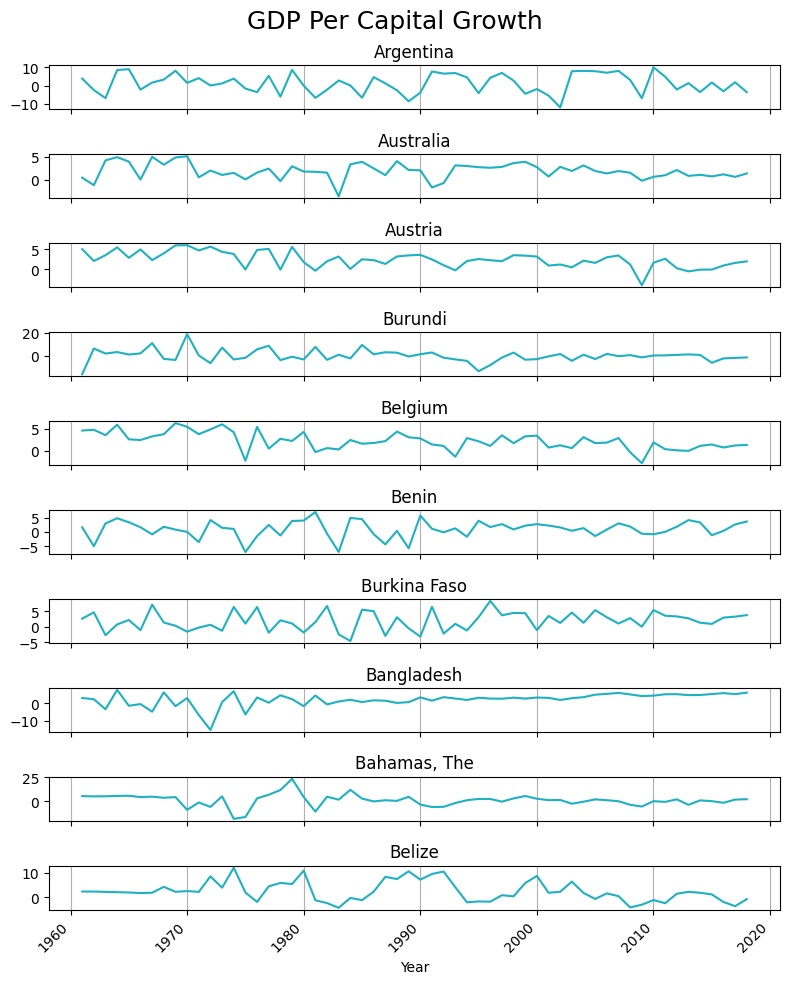

In [18]:
import matplotlib.pyplot as plt

def plot_trends(df, series_col, val_col, epoch_col, epoch_label, num_series=10,
                filepath=outp_fig_fname, chart_title=dataset_name):
    """
    This function takes a dataframe and a number of series to chart.
    It creates a n x 1 subplot (with n being the number of series, at most 10) and plots those series.
    
    Parameters:
    df (DataFrame): dataframe.
    num_series (int): The number of series to plot, defaulted to 10.
    """
    
    # Get the unique series from the dataframe
    unique_series = df[series_col].unique()
    
    # Limit the number of series to plot
    series_to_plot = unique_series[:min(len(unique_series), num_series)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_series, len(series_to_plot)), ncols=1, figsize=(8, num_series*1))
    
    # If there's only one series to plot, axes will not be an array, so we wrap it in a list
    if num_series == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each series on a separate subplot
    for i, (ax, series_id) in enumerate(zip(axes, series_to_plot)):
        # Filter the dataframe for the current series
        series_data = df[df[series_col] == series_id]
                
        # Plot the data
        ax.plot(series_data[epoch_col], series_data[val_col], color=plot_color)
        
        # Set the title and labels
        ax.set_title(series_id)
        # ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(series_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel(epoch_label)            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(chart_title, fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Plot a few series
plot_trends(
    data,
    series_col=series_col,
    val_col=value_col,
    epoch_col=epoch_col,
    epoch_label=epoch_label,
    num_series=10,
    filepath=outp_fig_fname,
    chart_title="GDP Per Capital Growth"
)  


# Save Main Data File

In [19]:
all_cols = [series_col, epoch_col, value_col] + exog_cols    
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False)

In [20]:
data[all_cols].head()

,Country Name,Year,GDP per Capita Growth
25,Algeria,1961-01-01,-15.127218
114,Algeria,1962-01-01,-20.910074
203,Algeria,1963-01-01,32.168302
292,Algeria,1964-01-01,4.017520
381,Algeria,1965-01-01,4.472788
